In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Read Data

In [2]:
pisa = pd.read_csv("pisa.csv", names = ["Lesekompetenz", "Mathematische Grundbildung", "Naturwissenschaftliche Grundbildung"])

In [3]:
pisa.head(5)

,Lesekompetenz,Mathematische Grundbildung,Naturwissenschaftliche Grundbildung
0,528,533,528
1,507,520,496
2,396,334,375
3,497,514,481
4,484,490,487


## Center Data

In [4]:
df_centered = pisa - pisa.mean()
df_centered.head(5)

,Lesekompetenz,Mathematische Grundbildung,Naturwissenschaftliche Grundbildung
0,34.548387,39.83871,35.387097
1,13.548387,26.83871,3.387097
2,-97.451613,-159.16129,-117.612903
3,3.548387,20.83871,-11.612903
4,-9.451613,-3.16129,-5.612903


# EDA

In [5]:
pisa.describe()

,Lesekompetenz,Mathematische Grundbildung,Naturwissenschaftliche Grundbildung
count,31.000000,31.000000,31.000000
mean,493.451613,493.161290,492.612903
std,33.307495,46.828123,37.669331
min,396.000000,334.000000,375.000000
25%,479.500000,473.000000,477.000000
50%,497.000000,503.000000,496.000000
75%,519.000000,524.500000,516.000000
max,546.000000,557.000000,552.000000


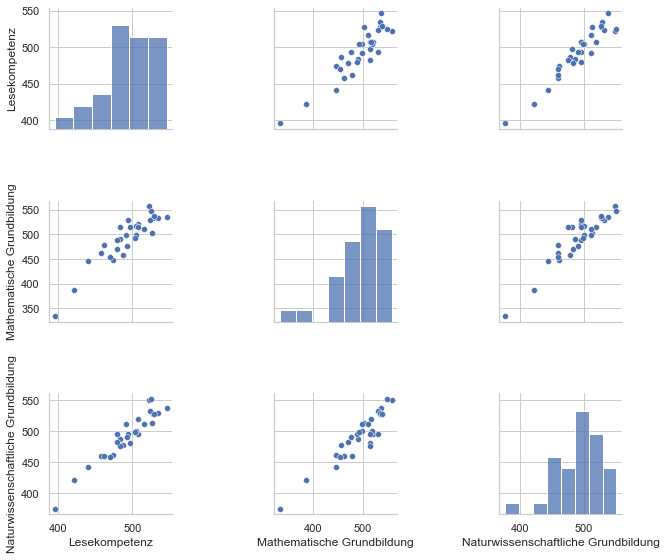

In [6]:
g = sns.pairplot(data=pisa)
g.fig.set_size_inches(10,8)
plt.show()

# PCA

In [7]:
# Get Covariance Matrix
pisa.cov()

,Lesekompetenz,Mathematische Grundbildung,Naturwissenschaftliche Grundbildung
Lesekompetenz,1109.389247,1428.324731,1195.613978
Mathematische Grundbildung,1428.324731,2192.873118,1644.031183
Naturwissenschaftliche Grundbildung,1195.613978,1644.031183,1418.978495


In [8]:
# Get Correlation Matrix
corr = pisa.corr()
corr

,Lesekompetenz,Mathematische Grundbildung,Naturwissenschaftliche Grundbildung
Lesekompetenz,1.000000,0.915753,0.952930
Mathematische Grundbildung,0.915753,1.000000,0.931999
Naturwissenschaftliche Grundbildung,0.952930,0.931999,1.000000


In [9]:
from sklearn.decomposition import PCA
# Define Hyperparams
N_COMPONENTS_PCA = 2

pca = PCA(n_components=N_COMPONENTS_PCA)
pisa_transformed = pca.fit_transform(pisa)

In [10]:
sum(pca.explained_variance_ratio_)

0.9877842902739055

In [11]:
pisa_transformed = pd.DataFrame(pisa_transformed, columns = [f"PC{i+1}" for i in range(0, N_COMPONENTS_PCA)])
pisa_transformed.head(5)

,PC1,PC2
0,-63.269938,-4.990971
1,-26.727833,10.862284
2,220.253541,-11.922061
3,-9.587884,18.443361
4,9.780874,5.163073


In [12]:
from sklearn.cluster import KMeans

clustering = KMeans(n_clusters=5)
clustering.fit_transform(pisa_transformed)
pisa_transformed["cluster"] = clustering.labels_

In [13]:
print(pisa_transformed.shape)
pisa_transformed.head(5)

(31, 3)


,PC1,PC2,cluster
0,-63.269938,-4.990971,1
1,-26.727833,10.862284,2
2,220.253541,-11.922061,3
3,-9.587884,18.443361,2
4,9.780874,5.163073,4


# Visualization
Plot into 2D PCA transformed pisa Data with KMeans Clustering.

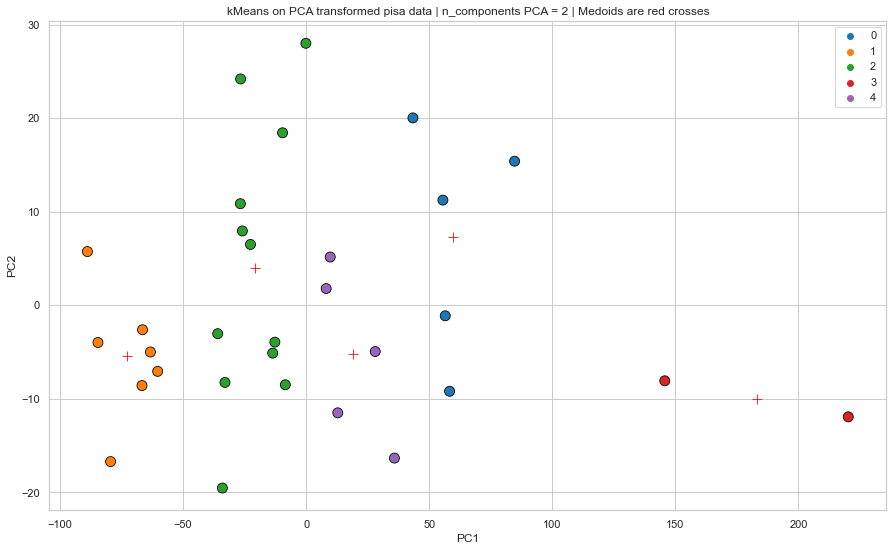

In [14]:
plt.figure(figsize=(15, 9))
plt.title(f"kMeans on PCA transformed pisa data | n_components PCA = {N_COMPONENTS_PCA} | Medoids are red crosses")
sns.scatterplot(data=pisa_transformed,
                x="PC1",
                y="PC2",
                hue="cluster",
                palette="tab10",
                s=100,
                edgecolor="black")
sns.scatterplot(x=clustering.cluster_centers_[:, 0],
                y=clustering.cluster_centers_[:, 1],
                s=100,
                marker="+",
                color="red")
plt.show()

# PCA Understanding

In [15]:
print(pca.explained_variance_)
print(pca.components_.T.shape)
pca.components_.T

[4513.53368412  150.0338682 ]
(3, 2)


array([[-0.47993961, -0.52383499],
       [-0.68430926,  0.72549442],
       [-0.54897979, -0.44637961]])

## Project and Reconstruct Data
Get Projection in 2D (Principal Components) by computing $F =  \tilde{X}V$

In [16]:
# The solution are the two principal components
V = pca.components_.T
F = (df_centered @ V)
print(F.shape)
F.head(5)

(31, 2)


,0,1
0,-63.269938,-4.990971
1,-26.727833,10.862284
2,220.253541,-11.922061
3,-9.587884,18.443361
4,9.780874,5.163073


## Approximate $\tilde{X}_{m}$ in 2D
m-Dimensional ($m=2$) centered Data $\tilde{X}_{[m]}$ gets approximated by multiplying the Principal Components $F$ with the Eigenvectors $V$ of the covariance matrix: $$\tilde{X}_{[m]} = F_{[m]}V'_{[m]}$$

In [17]:
# Take only first two Eigenvectors
V_m = V[:N_COMPONENTS_PCA]
# Approximate X_Tilde:
X_m = F @ V_m.T
print(X_m.shape)
X_m.head(5)

(31, 2)


,0,1
0,32.980195,39.675283
1,7.137701,26.170630
2,-99.463206,-159.370925
3,-5.059673,19.941634
4,-7.398827,-2.947362


# Comparison between 2D Reconstruction and Original 3D Data

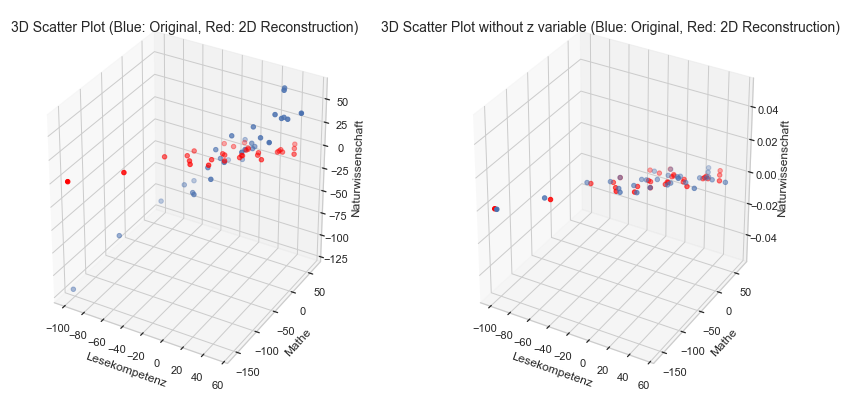

In [33]:
# Get Original Data (centered)
x = df_centered.iloc[:, 0].values
y = df_centered.iloc[:, 1].values
z = df_centered.iloc[:, 2].values

# Get Reconstruction Data
x_2 = X_m.iloc[:, 0].values
y_2 = X_m.iloc[:, 1].values

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(7)
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_title("3D Scatter Plot (Blue: Original, Red: 2D Reconstruction)", size=14)
ax1.scatter3D(x, y, z)
ax1.scatter3D(x_2, y_2, color="red")
ax1.set_xlabel("Lesekompetenz")
ax1.set_ylabel("Mathe")
ax1.set_zlabel("Naturwissenschaft")

# Plot if we leave z variable, i.e. feature 3 out.
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_title("3D Scatter Plot without z variable (Blue: Original, Red: 2D Reconstruction)", size=14)
ax2.scatter3D(x, y) # <-- Leave z out
ax2.scatter3D(x_2, y_2, color="red")
ax2.set_xlabel("Lesekompetenz")
ax2.set_ylabel("Mathe")
ax2.set_zlabel("Naturwissenschaft")
plt.show()